In [2]:
import os
path = os.path.abspath(os.getcwd())

In [3]:
%run -i common_functions

# I/ Data Formatting


In [4]:
# FILES
data_files = [
    'moduntu_HP_desktop_trace_jiffies_23.10.15_1h'
]

file = data_files[0]

## A. Text to CSV

In [5]:
def txtdmp_to_csv(filename):
    with open("data/" + filename + ".txt", "r") as textfile:
        textdump = textfile.read().splitlines()
        
    csvfile = open("csv/" + filename + ".csv", "w")
    csvfile.write(','.join(["count", "timestamp", "regs", "irq", "swab", "jiffies", "idle"]))
    csvfile.write('\n')

    count = 0
    for line in textdump: 
        splitline = line.replace('@','').replace(',','').split(' ')
        values, start, idle = [], False, False

        for i in splitline: 
            # extract add_interrupt_randomness values
            if i == "add_interrupt_randomness:":
                start = True
                count += 1
                values.append(str(count))
            elif start and i != "a":
                values.append(i)

            # Check for idle
            if i == "<idle>-0":
                idle = True

        if values != []:
            values.append(str(idle))
            csvfile.write(','.join(values))
            csvfile.write('\n')

    csvfile.close()

## B. Data Import

In [6]:
# Show stats for 'idle' column.
data_path = path + "\\csv\\" + file + ".csv"
data = pd.read_csv(data_path)

print(file)
for col in ["idle"]:
    get_stats(data, col)

moduntu_HP_desktop_trace_jiffies_23.10.15_1h
    Stats for idle :
        True		 364229		 91%
        False		 35451		 9%



In [7]:
data.head(3)

,count,timestamp,regs,irq,swab,jiffies,idle
0,1,51036824464,18446744072313314992,0,0,4294892297,True
1,2,51045994495,18446744072313314992,0,0,4294892298,True
2,3,51055176440,18446744072313314992,0,0,4294892299,True


# II/ Analysis of the Jiffies

## A. Undifferenced Variable

### 1) Direct Plotting

Plot of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 log = False


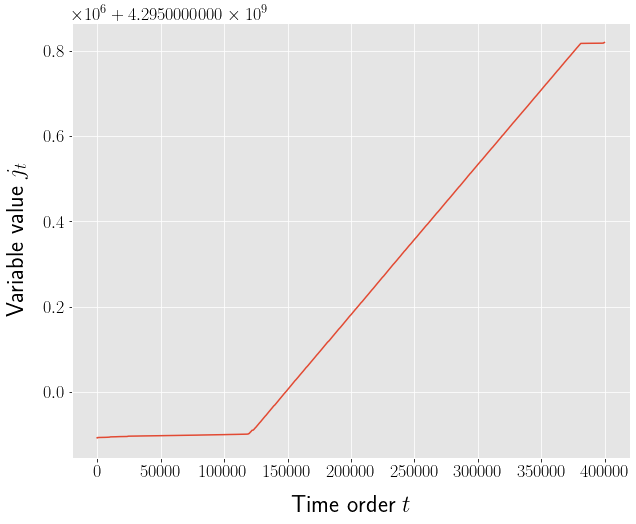

In [8]:
data_plot(file, 'jiffies', log=False, ylabel=r'Variable value $j_t$')

Plot of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 109268, 36422
	 # of elements: 218539
	 log = True


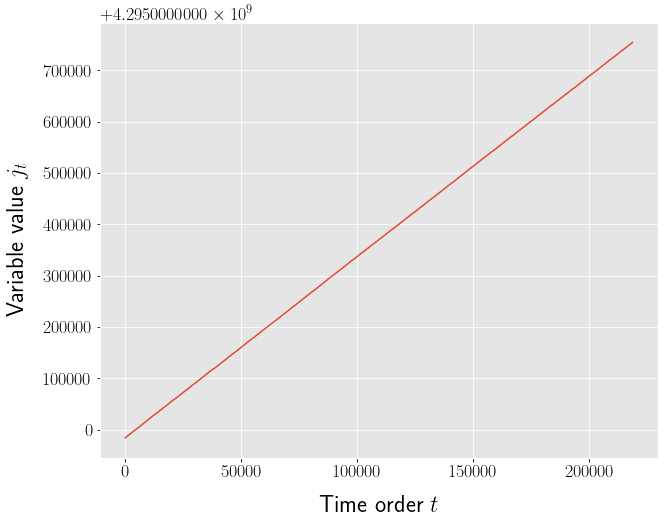

In [34]:
data_plot(file, 'jiffies', selection = [('idle', True)], crop = (0.3, 0.1), log = True,
          ylabel=r'Variable value $j_t$')

### 2) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = False


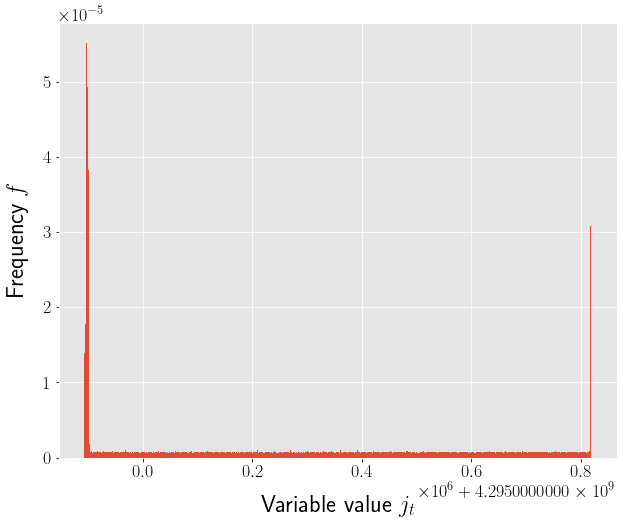

In [10]:
data_hist(file, 'jiffies', log=False, xlabel=r'Variable value $j_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: [('idle', True)]
	 crop values: 109268, 36422
	 # of elements: 218539
	 # of bins: 467
	 log = True


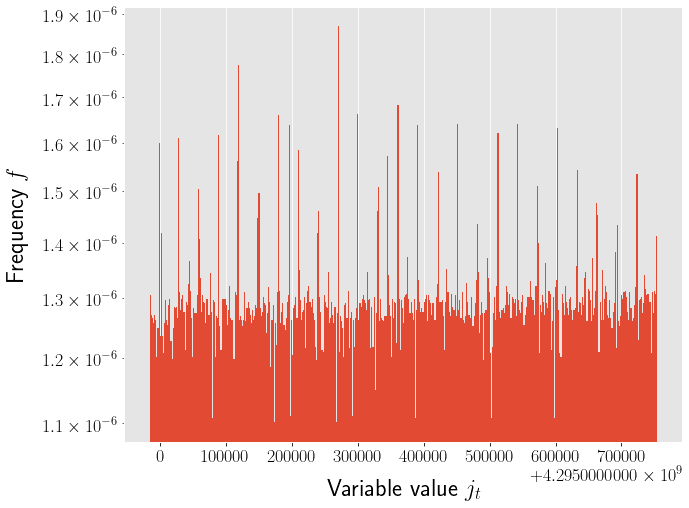

In [35]:
data_hist(file, 'jiffies', selection = [('idle', True)], crop = (0.3, 0.1), log = True,
          xlabel=r'Variable value $j_t$')

### 3) Correlogram

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


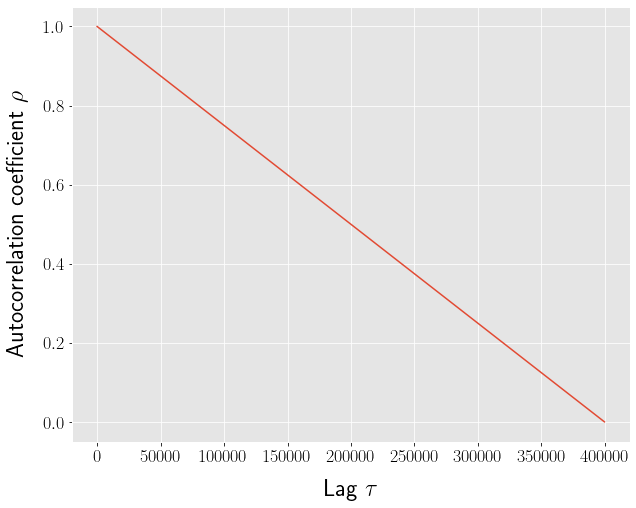

In [12]:
data_autocorr(file, 'jiffies', mode='fft', diff_order=0)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 0
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


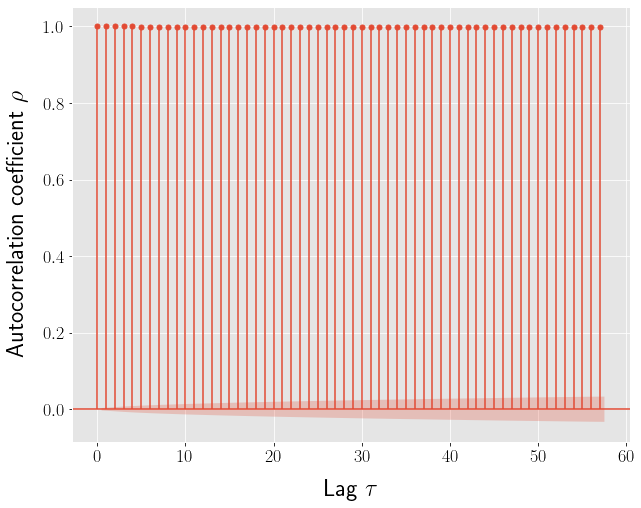

In [13]:
data_autocorr(file, 'jiffies', mode='acf', diff_order=0)

## B. First-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = True


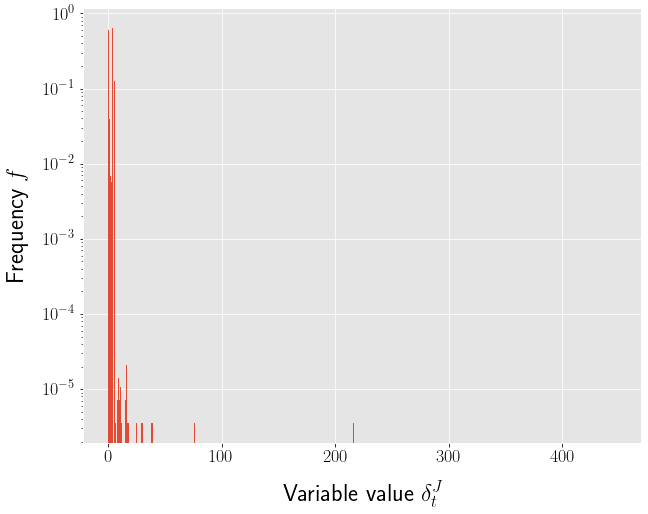

In [14]:
data_hist(file, 'jiffies', diff_order=1, log=True, xlabel=r'Variable value $\delta^J_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: [('idle', True)]
	 crop values: 72845, 36422
	 # of elements: 254962
	 # of bins: 504
	 log = True


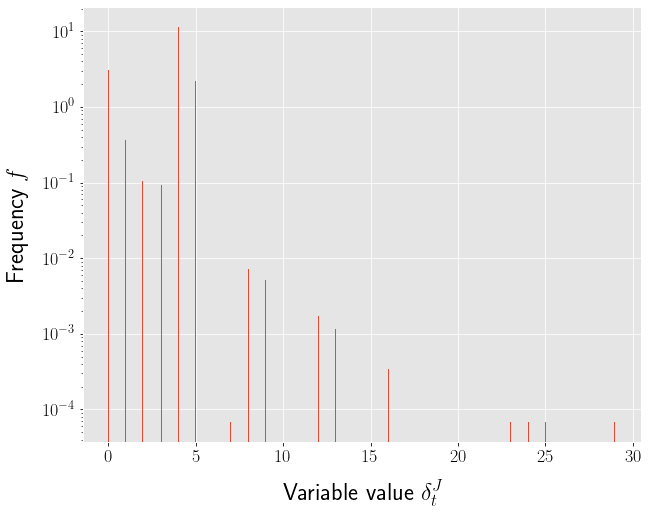

In [30]:
data_hist(file, 'jiffies', diff_order=1, selection=[('idle', True)], crop=(0.2, 0.1), log=True, 
         xlabel=r'Variable value $\delta^J_t$')

### 2) Correlogram

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


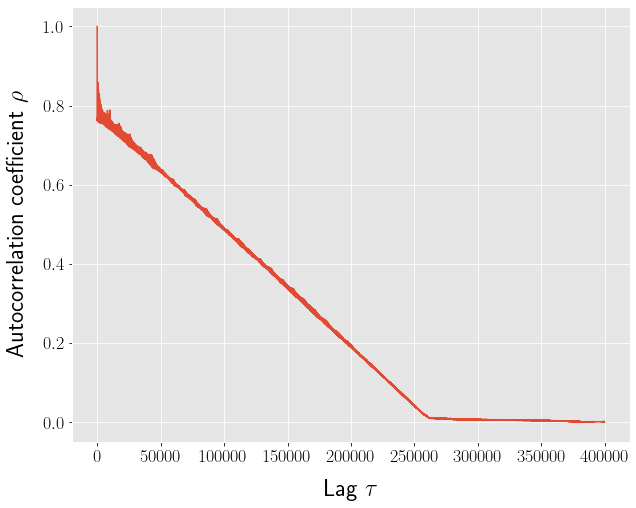

In [16]:
data_autocorr(file, 'jiffies', mode='fft', diff_order=1)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 1
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


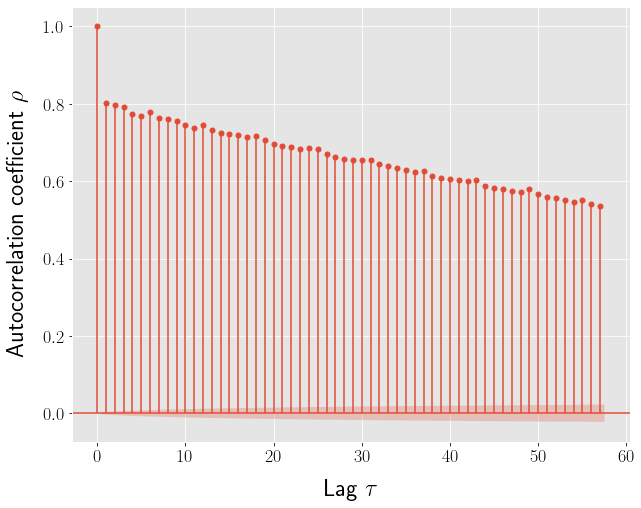

In [17]:
data_autocorr(file, 'jiffies', mode='acf', diff_order=1)

## C. Second-Order Differencing

### 1) Histogram

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680
	 # of bins: 632
	 log = True


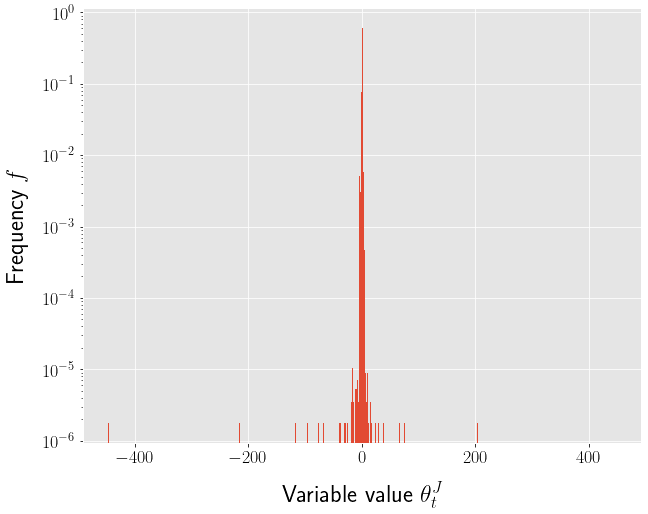

In [18]:
data_hist(file, 'jiffies', diff_order=2, log = True, xlabel=r'Variable value $\theta^J_t$')

Histogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: [('idle', True)]
	 crop values: 72845, 36422
	 # of elements: 254962
	 # of bins: 504
	 log = True


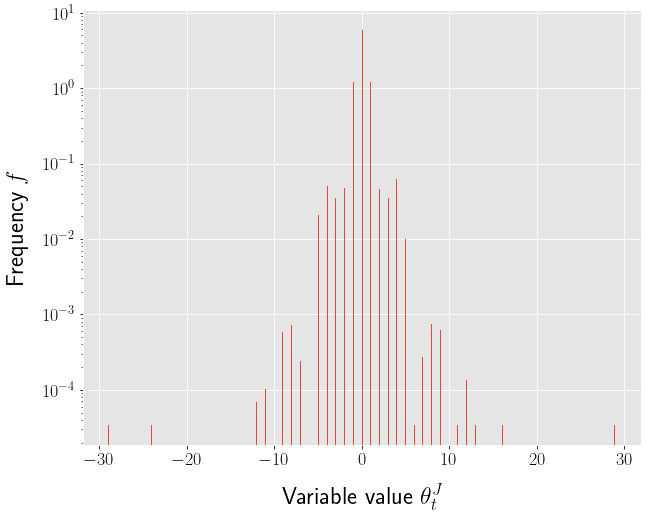

In [29]:
data_hist(file, 'jiffies', diff_order=2, selection=[('idle', True)], crop=(0.2, 0.1), log=True,
         xlabel=r'Variable value $\theta^J_t$')

### 2) Autocorrelation

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


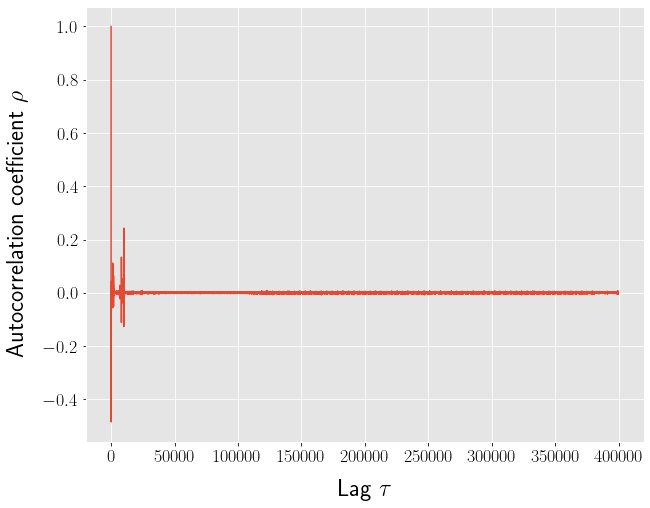

In [20]:
data_autocorr(file, 'jiffies', mode='fft', diff_order=2)

Correlogram of moduntu_HP_desktop_trace_jiffies_23.10.15_1h :
	 differencing order: 2
	 selection: []
	 crop values: 0, 0
	 # of elements: 399680


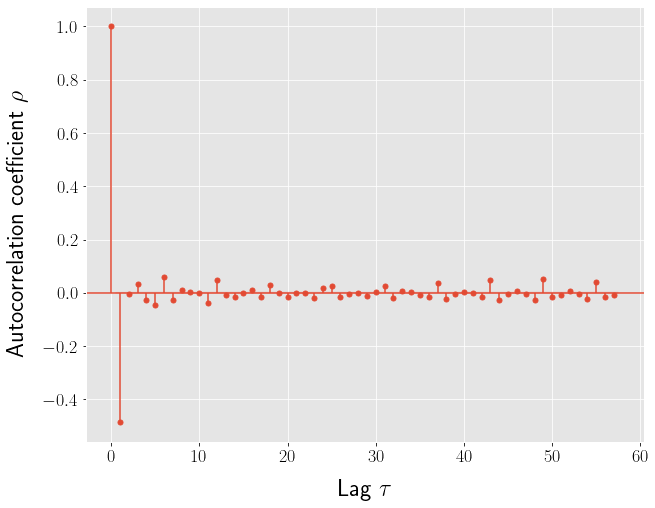

In [21]:
data_autocorr(file, 'jiffies', mode='acf', diff_order=2)

## D. Model

In [36]:
data_freq(file, 'jiffies', diff_order=1, selection=[('idle', True)], crop=(0.3, 0.1))

,Unique Value,Count,Ratio,Percentage
0,4,152532,0.697962,69.796238
1,0,30152,0.137971,13.797080
2,5,29630,0.135582,13.558221
3,1,3616,0.016546,1.654625
4,2,1263,0.005779,0.577929
5,3,1144,0.005235,0.523476
6,8,93,0.000426,0.042555
7,9,67,0.000307,0.030658
8,12,22,0.000101,0.010067
9,13,15,0.000069,0.006864


In [37]:
data_freq(file, 'jiffies', diff_order=2, selection=[('idle', True)], crop=(0.3, 0.1))

,Unique Value,Count,Ratio,Percentage
0,0,148487,0.679453,67.945310
1,1,31346,0.143434,14.343435
2,-1,31094,0.142281,14.228124
3,4,1535,0.007024,0.702392
4,-4,1247,0.005706,0.570608
5,-2,1147,0.005248,0.524849
6,2,1107,0.005065,0.506546
7,-3,859,0.003931,0.393065
8,3,839,0.003839,0.383913
9,-5,522,0.002389,0.238859
